In [21]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics, datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import seaborn as sns
%matplotlib inline





from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


In [2]:
data = pd.read_csv("data/austin_weather.csv")


In [3]:
cle_data = data.drop(['Events','Date','SeaLevelPressureHighInches','SeaLevelPressureLowInches'], axis = 1)

cle_data['PrecipitationSumInches'].replace('T','0.001', inplace=True)
print(cle_data.shape)

(1319, 17)


In [4]:
cle_data.drop(cle_data.index[cle_data['TempHighF'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['TempAvgF'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['TempLowF'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['DewPointHighF'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['DewPointAvgF'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['DewPointLowF'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['HumidityHighPercent'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['HumidityAvgPercent'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['HumidityLowPercent'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['VisibilityHighMiles'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['VisibilityAvgMiles'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['VisibilityLowMiles'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['WindHighMPH'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['WindAvgMPH'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['WindGustMPH'] == '-'], inplace = True)

C:\Users\Ali\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(cle_data)

      TempHighF  TempAvgF  TempLowF DewPointHighF DewPointAvgF DewPointLowF  \
0            74        60        45            67           49           43   
1            56        48        39            43           36           28   
2            58        45        32            31           27           23   
3            61        46        31            36           28           21   
4            58        50        41            44           40           36   
5            57        48        39            39           36           33   
6            60        53        45            41           39           37   
7            62        51        40            43           39           33   
8            64        50        36            49           41           28   
9            44        40        35            31           26           21   
10           55        46        36            31           28           23   
11           69        54        39            51   

In [6]:
train, test = train_test_split(cle_data, test_size=0.2, random_state = 142)
print(test.shape)
print(train.shape)

(261, 17)
(1044, 17)


In [7]:
X_train=train.drop(['PrecipitationSumInches'], axis = 1)
y_train = train['PrecipitationSumInches']
X_test=test.drop(['PrecipitationSumInches'], axis = 1)
y_test = test['PrecipitationSumInches']
print("X_train:" ,X_train.shape)
print("y_train:" ,y_train.shape)
print("X_test:" ,X_test.shape)
print("y_train:" ,y_test.shape)

X_train: (1044, 16)
y_train: (1044,)
X_test: (261, 16)
y_train: (261,)


In [8]:
print(cle_data.columns)

Index(['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF',
       'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent',
       'HumidityLowPercent', 'SeaLevelPressureAvgInches',
       'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
       'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'PrecipitationSumInches'],
      dtype='object')


In [9]:
#sns.pairplot(cle_data, hue="PrecipitationSumInches")

In [10]:
reg = linear_model.LinearRegression()
X = cle_data[['PrecipitationSumInches']]
y = cle_data[['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF',
       'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent',
       'HumidityLowPercent', 'SeaLevelPressureAvgInches',
       'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
       'WindHighMPH', 'WindAvgMPH', 'WindGustMPH']]
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [[-2.34040817e+00]
 [-5.96695213e-01]
 [ 1.20597578e+00]
 [ 4.35377067e+00]
 [ 4.39894105e+00]
 [ 4.74149448e+00]
 [ 5.86293365e+00]
 [ 1.00875329e+01]
 [ 1.42555040e+01]
 [-4.95424534e-02]
 [ 3.60859990e-03]
 [-1.47296372e+00]
 [-3.70570999e+00]
 [ 1.94006436e+00]
 [ 1.62137111e-01]
 [ 2.76256992e+00]] + [81.06280585 70.62681134 59.68055508 61.01333267 56.12841908 50.39611167
 87.15616801 65.49707202 43.33647428 30.02856061  9.99115385  9.33267479
  7.27116133 13.02100767  4.99045807 21.06465234]


In [11]:
reg = linear_model.LinearRegression()
X = cle_data[['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF',
       'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent',
       'HumidityLowPercent', 'SeaLevelPressureAvgInches',
       'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
       'WindHighMPH', 'WindAvgMPH', 'WindGustMPH']]
y = cle_data[['PrecipitationSumInches' ]]
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [[ 0.03575728 -0.05885359  0.03393654  0.0107865  -0.03151602  0.01179722
   0.00553401 -0.01266394  0.01422273 -0.06563852  0.23627181 -0.09466134
  -0.0063792   0.04915989 -0.04265667 -0.00393448]] + [-0.24449285]


In [12]:
cle_data.shape
cle_data.to_csv(r'Data\cleaned_data.csv')

In [13]:
data = pd.read_csv("data/cleaned_data..csv")

In [14]:
X = data.drop(['PrecipitationSumInches'], axis=1)
Y = data['PrecipitationSumInches']
Y = Y.values.reshape(-1, 1)

In [15]:
day_index = 798
days = [i for i in range(Y.size)]

In [16]:
clf = LinearRegression()
clf.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
input = np.array([[74], [60], [45], [67], [49], [43], [93], [75], [57], [29.68], [10], [7], [2], [20], [4], [31]])
input = input.reshape(1, -1)
print(clf.predict(input))

[[0.88851029]]


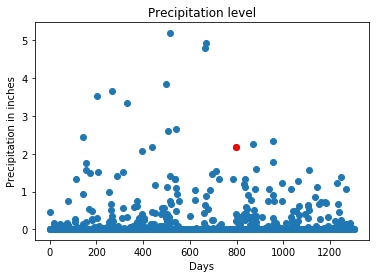

In [18]:
plt.scatter(days, Y)
plt.scatter(days[day_index], Y[day_index], color='r')
plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")
plt.show()

In [19]:
x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH'], axis=1)

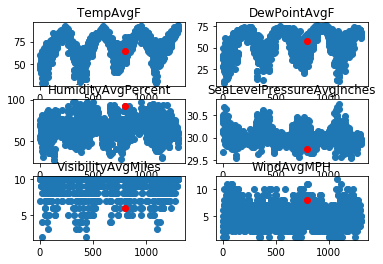

In [20]:
for i in range(x_vis.columns.size):
    plt.subplot(3,2,i+1)
    plt.scatter(days, x_vis[x_vis.columns.values[i]])
    plt.scatter(days[day_index], x_vis[x_vis.columns.values[i]][day_index], color='r')
    plt.title(x_vis.columns.values[i])

plt.show()

# Logistic Regression

In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_test.value_counts()

0        169
0.001     25
0.01      12
0.02       7
0.07       6
0.4        3
0.06       3
0.76       2
0.17       2
0.16       2
0.04       2
0.49       1
0.33       1
1.05       1
0.37       1
0.22       1
1.75       1
0.36       1
0.57       1
0.2        1
1.22       1
0.1        1
0.15       1
1.12       1
0.66       1
0.41       1
1.39       1
1.79       1
1.57       1
0.24       1
1.46       1
0.13       1
0.26       1
3.66       1
1.07       1
0.05       1
0.75       1
0.27       1
0.34       1
Name: PrecipitationSumInches, dtype: int64

In [25]:
y_pred = model.predict(X_test)
print("Test accuracy:" , accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Test accuracy: 0.6436781609195402
[[167   1   0 ...   0   0   0]
 [ 22   1   0 ...   0   0   0]
 [  6   3   0 ...   0   1   0]
 ...
 [  0   0   1 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [26]:
train_pred = model.predict(X_train)
print("Train accuracy:  ", accuracy_score(y_train, train_pred))

Train accuracy:   0.7337164750957854


In [38]:
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 5 , step = 1)
rfe.fit(X_train, y_train)

C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=5, step=1, verbose=0)

In [39]:
y_pred = rfe.predict(X_test)
print("Accuracy score with 5 features:  " , accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy score with 5 features:   0.6436781609195402
[[168   0   0 ...   0   0   0]
 [ 25   0   0 ...   0   0   0]
 [ 11   0   0 ...   0   0   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]]


In [40]:
print(rfe.support_)
print(X_train.columns)

[False False False False False  True False False False  True False  True
  True False  True False]
Index(['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF',
       'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent',
       'HumidityLowPercent', 'SeaLevelPressureAvgInches',
       'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
       'WindHighMPH', 'WindAvgMPH', 'WindGustMPH'],
      dtype='object')


In [41]:
X = data.drop(['PrecipitationSumInches'], axis=1)
Y_temp = data['PrecipitationSumInches']
Y_temp = Y_temp.values.reshape(-1, 1)

In [42]:
Y = []

x1 = pd.DataFrame(columns=X.columns.values)
x2 = pd.DataFrame(columns=X.columns.values)
x3 = pd.DataFrame(columns=X.columns.values)
x4 = pd.DataFrame(columns=X.columns.values)
for i in range(Y_temp.size):
    if(Y_temp[i]<0.001):
        Y.append(1)
        x1.loc[i] = X.loc[i]
    elif(Y_temp[i]>=0.001 and Y_temp[i]<0.1):
        Y.append(2)
        x2.loc[i] = X.loc[i]
    elif(Y_temp[i]>=0.1 and Y_temp[i]<1.2):
        Y.append(3)
        x3.loc[i] = X.loc[i]
    else:
        Y.append(4)
        x4.loc[i] = X.loc[i]

Y = np.array(Y).reshape(len(Y), )

In [43]:
logr = LogisticRegression(multi_class='ovr', solver='liblinear').fit(X, Y)

In [44]:
#input = np.array([[74], [60], [45], [67], [49], [43], [93], [75], [57], [29.68], [10], [7], [2], [20], [4], [31]])
input = np.array([[58], [43], [28], [37], [22], [18], [75], [49], [22], [30.35], [10], [10], [10], [14], [4], [21]])
input = input.reshape(1, -1)
classes = ['None', 'No Rain', 'Drizzles', 'Moderate Rains', 'Heavy Rains']
print(classes[int(logr.predict(input))])




No Rain


In [45]:
x1 = x1.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH'], axis=1)
x2 = x2.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH'], axis=1)
x3 = x3.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH'], axis=1)
x4 = x4.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH'], axis=1)



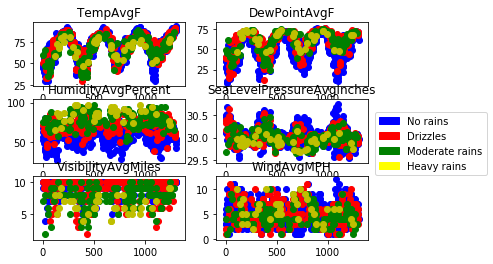

In [46]:
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.scatter(x1.index.values, x1[x1.columns.values[i]], color='b')
    plt.scatter(x2.index.values, x2[x2.columns.values[i]], color='r')
    plt.scatter(x3.index.values, x3[x3.columns.values[i]], color='g')
    plt.scatter(x4.index.values, x4[x4.columns.values[i]], color='y')
    plt.title(x1.columns.values[i])

blue_patch = mpatches.Patch(color='blue', label='No rains')
red_patch = mpatches.Patch(color='red', label='Drizzles')
green_patch = mpatches.Patch(color='green', label='Moderate rains')
yellow_patch = mpatches.Patch(color='yellow', label='Heavy rains')
plt.legend(handles=[blue_patch, red_patch, green_patch, yellow_patch], bbox_to_anchor=(1.05, 2), loc=2, borderaxespad=0.)

plt.show()